### Instalando os pacotes necessários



In [ ]:
!pip install  tflite-model-maker
!pip install  pycocotools

In [5]:
import numpy as np
import os
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
import tensorflow as tf

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


**Carregando os datasets.**




In [6]:
#Conectando no google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Etapa 2. Apontar os caminhos onde se encontra os datasets.**

* Definir os caminhos dos datasets e as classes que usaremos para treinar os algoritmos posteriomente.

In [7]:
#Caminhos apontando para dados de treinamento e validação, respectivamente. Imagens e anotações xml estão no mesmo local.
train_image_dir= '/content/drive/MyDrive/Dogs/train'
train_image_annotations= '/content/drive/MyDrive/Dogs/train'
valid_image_dir='/content/drive/MyDrive/Dogs/valid'
test_image_dir= '/content/drive/MyDrive/Dogs/test'

# As classes do nosso dataset.
label_map={1:'Affenpinscher', 2:'Afghan Hound',3:'Airedale Terrier',4:'Akita',5:'Alaskan Malamute', 6:'American Eskimo Dog',7:'American Foxhound',8:'American Staffordshire Terrier',9:'American Water Spaniel',
           10:'Anatolian Shepherd Dog',11:'Australian Cattle Dog',12:'Australian Shepherd',13:'Australian Terrier',14:'Basenji',15:'Basset Hound',16:'Beagle',17:'Bearded Collie',
           18:'Beauceron',19:'Bedlington Terrier',20:'Belgian Malinois',21:'Belgian Sheepdog',22:'Belgian Tervuren',23:'Bernese Mountain Dog',24:'Bichon Frise',
           25:'Black And Tan Coonhound',26:'Black Russian Terrier',27:'Bloodhound',28:'Bluetick Coonhound',29:'Border Collie',30:'Border Terrier'}
print(label_map)

# Carregando os dados de treino. Os dados são carregados como tfrecord e armazenados no local cache_dir, para uso futuro rápido. 
train_ds = object_detector.DataLoader.from_pascal_voc(images_dir=train_image_dir,
                                                      annotations_dir= train_image_dir,
                                                      label_map=label_map
                                                     )
# Carregando os dados de validação.
valid_ds = object_detector.DataLoader.from_pascal_voc(images_dir=valid_image_dir,
                                                      annotations_dir= valid_image_dir,
                                                      label_map=label_map,
                                                     )
# Carregando os dados de teste.
test_ds = object_detector.DataLoader.from_pascal_voc(images_dir=test_image_dir,
                                                      annotations_dir= test_image_dir,
                                                      label_map=label_map,
                                                     )

print("Train dataset contém {} images".format(train_ds.__len__()))

{1: 'Affenpinscher', 2: 'Afghan Hound', 3: 'Airedale Terrier', 4: 'Akita', 5: 'Alaskan Malamute', 6: 'American Eskimo Dog', 7: 'American Foxhound', 8: 'American Staffordshire Terrier', 9: 'American Water Spaniel', 10: 'Anatolian Shepherd Dog', 11: 'Australian Cattle Dog', 12: 'Australian Shepherd', 13: 'Australian Terrier', 14: 'Basenji', 15: 'Basset Hound', 16: 'Beagle', 17: 'Bearded Collie', 18: 'Beauceron', 19: 'Bedlington Terrier', 20: 'Belgian Malinois', 21: 'Belgian Sheepdog', 22: 'Belgian Tervuren', 23: 'Bernese Mountain Dog', 24: 'Bichon Frise', 25: 'Black And Tan Coonhound', 26: 'Black Russian Terrier', 27: 'Bloodhound', 28: 'Bluetick Coonhound', 29: 'Border Collie', 30: 'Border Terrier'}
Train dataset contém 3989 images


In [8]:
spec = model_spec.get('efficientdet_lite0')

**Etapa 3. Treinar o modelo do TensorFlow com os dados de treinamento.**

* O modelo EfficientDet-Lite0 usa `epochs = 20` por padrão, o que significa que ele passará pelo conjunto de dados de treinamento 20 vezes. Você pode observar a precisão da validação durante o treinamento e parar antes para evitar o overfitting.
* Definir `batch_size = 30` aqui, então você verá que são necessários mais ou menos 132 passos para percorrer as 4000 imagens no conjunto de dados de treinamento.
* Definir `train_whole_model=True` para ajustar todo o modelo em vez de apenas treinar a camada principal para melhorar a precisão. A desvantagem é que pode levar mais tempo para treinar o modelo.

In [9]:
model = object_detector.create(train_ds, model_spec=spec, batch_size=30, train_whole_model=True, validation_data=valid_ds,epochs = 20)

Epoch 1/20
132/132 [==============================] - 1341s 10s/step - det_loss: 1.5764 - cls_loss: 1.2840 - box_loss: 0.0058 - reg_l2_loss: 0.0680 - loss: 1.6444 - learning_rate: 0.0227 - gradient_norm: 1.0931 - val_det_loss: 1.5614 - val_cls_loss: 1.2508 - val_box_loss: 0.0062 - val_reg_l2_loss: 0.0681 - val_loss: 1.6295
Epoch 2/20
132/132 [==============================] - 1330s 10s/step - det_loss: 1.0330 - cls_loss: 0.8940 - box_loss: 0.0028 - reg_l2_loss: 0.0684 - loss: 1.1014 - learning_rate: 0.0369 - gradient_norm: 1.4790 - val_det_loss: 1.1271 - val_cls_loss: 0.8907 - val_box_loss: 0.0047 - val_reg_l2_loss: 0.0687 - val_loss: 1.1957
Epoch 3/20
132/132 [==============================] - 1372s 10s/step - det_loss: 0.7976 - cls_loss: 0.6859 - box_loss: 0.0022 - reg_l2_loss: 0.0688 - loss: 0.8664 - learning_rate: 0.0359 - gradient_norm: 1.3757 - val_det_loss: 1.0350 - val_cls_loss: 0.8207 - val_box_loss: 0.0043 - val_reg_l2_loss: 0.0690 - val_loss: 1.1040
Epoch 4/20
132/132 [=====

**Etapa 4. Exportar como um modelo do TensorFlow Lite.**

Exportar o modelo de detecção de dogs treinado para o formato TensorFlow Lite especificando para qual pasta deseja exportar o modelo quantizado. A técnica padrão de quantização pós-treinamento é a quantização de número inteiro completo.

In [10]:
model.export(export_dir='.')

In [11]:
model.export(export_dir='/content/drive/MyDrive/Dogs/')

**Step 5. Avaliando o modelo do TensorFlow Lite.**

Vários fatores podem afetar a precisão do modelo ao exportar para TFLite:
* [Quantization](https://www.tensorflow.org/lite/performance/model_optimization) ajuda a reduzir o tamanho do modelo em 4 vezes à custa de alguma queda de precisão.
* O modelo TensorFlow original usa por classe [non-max supression (NMS)](https://www.coursera.org/lecture/convolutional-neural-networks/non-max-suppression-dvrjH) para pós-processamento, enquanto o modelo TFLite usa NMS global que é muito mais rápido, mas menos preciso.
O Keras gera no máximo 100 detecções, enquanto o tflite gera no máximo 25 detecções.


In [12]:
model.evaluate_tflite('model.tflite', train_ds)

3989/3989 [==============================] - 8317s 2s/step



{'AP': 0.62099427,
 'AP50': 0.7410902,
 'AP75': 0.70395917,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.6210025,
 'ARmax1': 0.6483145,
 'ARmax10': 0.70568115,
 'ARmax100': 0.7059332,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.7059332,
 'AP_/Affenpinscher': 0.87149376,
 'AP_/Afghan Hound': 0.5136856,
 'AP_/Airedale Terrier': 0.78476685,
 'AP_/Akita': 0.55528533,
 'AP_/Alaskan Malamute': 0.7802958,
 'AP_/American Eskimo Dog': 0.82589316,
 'AP_/American Foxhound': 0.158382,
 'AP_/American Staffordshire Terrier': 0.22183372,
 'AP_/American Water Spaniel': 0.63340116,
 'AP_/Anatolian Shepherd Dog': 0.08660795,
 'AP_/Australian Cattle Dog': 0.59737337,
 'AP_/Australian Shepherd': 0.55749035,
 'AP_/Australian Terrier': 0.6580439,
 'AP_/Basenji': 0.7876786,
 'AP_/Basset Hound': 0.62881213,
 'AP_/Beagle': 0.36816183,
 'AP_/Bearded Collie': 0.7341808,
 'AP_/Beauceron': 0.74190855,
 'AP_/Bedlington Terrier': 0.6259564,
 'AP_/Belgian Malinois': 0.50718844,
 'AP_/Belgian Sheepdog': 0.84359574,
 'AP_/Belgian T

## Teste o modelo TFLite em sua imagem

Você pode testar o modelo TFLite treinado usando imagens da Internet.
* Substitua `INPUT_IMAGE_URL` abaixo pela imagem de entrada desejada.
* Ajuste o `DETECTION_THRESHOLD` para alterar a sensibilidade do modelo.
*A limiar mais baixo significa que o modelo irá pegar mais objetos, mas também haverá mais detecção falsa. Enquanto isso, um limite mais alto significa que o modelo só coletará objetos que detectou com segurança.



In [13]:
import tensorflow as tf
import numpy as np

In [22]:
pip install opencv-python==4.7.0.68

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
#@title Carregando o modelo TFLite treinado e definindo algumas funções de visualização

import cv2

from PIL import Image

model_path = 'model.tflite'

# Carrega os rótulos em uma lista
classes = ['Affenpinscher','Afghan Hound', 'Airedale Terrier','Akita','Alaskan Malamute','American Eskimo Dog','American Foxhound','American Staffordshire Terrier','American Water Spaniel',
           'Anatolian Shepherd Dog', 'Australian Cattle Dog','Australian Shepherd','Australian Terrier','Basenji','Basset Hound','Beagle','Bearded Collie',
           'Beauceron','Bedlington Terrier','Belgian Malinois','Belgian Sheepdog','Belgian Tervuren','Bernese Mountain Dog','Bichon Frise',
           'Black And Tan Coonhound','Black Russian Terrier','Bloodhound','Bluetick Coonhound','Border Collie','Border Terrier']


# Define uma lista de cores para visualização
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Pré-processa a imagem de entrada para alimentar o modelo TFLite."""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Retorna uma lista de resultados de detecção, cada um um dicionário de informações de objeto."""

  signature_fn = interpreter.get_signature_runner()

  # Alimenta a imagem de entrada para o modelo
  output = signature_fn(images=image)

  # Obtém todas as saídas do modelo
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Executa a detecção de objetos na imagem de entrada e desenhe os resultados da detecção"""

  # Carrega a forma de entrada exigida pelo modelo
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Carrega a imagem de entrada e pré-processe-a
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Executa a detecção de objetos na imagem de entrada
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plota os resultados da detecção na imagem de entrada
  original_image_np = original_image.numpy().astype(np.uint8)

  for obj in results:
    # Converte a caixa delimitadora do objeto de coordenadas relativas para absolutas
    # coordenadas com base na resolução da imagem original
    ymin, xmin, ymax, xmax = obj['bounding_box']

    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Encontra o índice da classe do objeto atual
    class_id = int(obj['class_id'])

    # Desenhe a caixa delimitadora e o rótulo na imagem
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)

    # Faz ajustes para tornar o rótulo visível para todos os objetos
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Retorna a imagem final
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

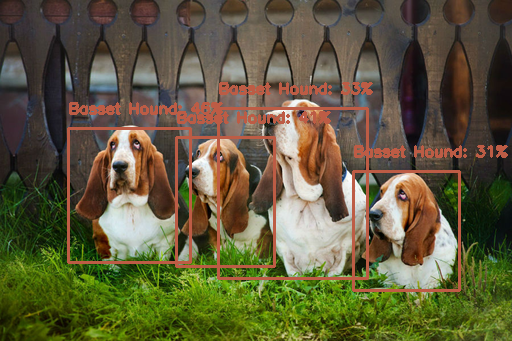

In [65]:
#@title Executa a detecção de objetos e mostra os resultados da detecção

INPUT_IMAGE_URL = "https://vidanimal.com.br/wp-content/uploads/basset-hound-intro.jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.2 #@param {type:"number"}

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Carrega o modelo TFLite
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Executa a inferência e desenhe o resultado da detecção na cópia local do arquivo original
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

#Mostra o resultado da detecção
Image.fromarray(detection_result_image)